# YouTube Kids Content Statistical Analysis
This project analyzes trending YouTube videos for children using a filtered dataset.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1: Data Cleaning and Wrangling

## Step 1: Data Cleaning and Wrangling

In this step, we prepare the dataset for analysis by:
- Converting `publish_time` to a datetime format
- Checking data types to ensure consistency
- Identifying and addressing missing values
- Dropping irrelevant or empty columns (e.g., `description`, `thumbnail_link`)
- Removing duplicate rows
- Filtering out invalid numerical entries (e.g., negative likes or zero views)

This process ensures that our data is clean, structured, and ready for meaningful statistical analysis.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Use the correct file path from Google Drive
file_path = "/content/drive/MyDrive/Math 301 Midterm project/Filtered_Kids_Youtube_Videos.csv"
df = pd.read_csv(file_path)

# Preview the first few rows
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ‚ñ∂ \n\nSUBSCRIBE ‚ñ∫ ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


⚠️ **Note on Dataset Filtering**

Although the file is named `Filtered_Kids_Youtube_Videos.csv`, a few entries may not be true children’s content. For example, videos with titles like “WE WANT TO TALK ABOUT OUR MARRIAGE” suggest the presence of adult-targeted content. This is a known limitation of keyword-based filtering. For the purpose of this project, we kept all entries to preserve dataset integrity and size, but future improvements could include stricter category or channel filtering.

In [26]:
# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Check data types
df.dtypes

,0
video_id,object
trending_date,object
title,object
channel_title,object
category_id,int64
publish_time,"datetime64[ns, UTC]"
tags,object
views,int64
likes,int64
dislikes,int64


In [27]:
# Check for missing values
df.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


In [28]:
# Drop irrelevant or empty columns
df = df.drop(['thumbnail_link', 'description', 'video_error_or_removed'], axis=1)

# Drop duplicates
df = df.drop_duplicates()

# Filter invalid numeric entries
df = df[(df['views'] > 0) & (df['likes'] >= 0) & (df['comment_count'] >= 0)]

# Show cleaned data
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


We removed duplicates, dropped empty/irrelevant columns, and filtered invalid rows.

## Step 2: Measures of Central Tendency

## Step 2: Measures of Central Tendency

Here, we explore the average values in the dataset using:
- **Mean**: the average number of views
- **Median**: the middle value for likes
- **Mode**: the most common category ID

These values help us understand typical engagement metrics in kids’ YouTube content.

In [13]:
print("Mean views:", df['views'].mean())
print("Median likes:", df['likes'].median())
print("Most common category ID:", df['category_id'].mode()[0])

Mean views: 2360678.0387276593
Median likes: 18069.0
Most common category ID: 24


## Step 3: Measures of Spread

We assess how spread out or variable the data is by calculating:
- **Standard Deviation**: how much view counts deviate from the average
- **Interquartile Range (IQR)**: the range between the 25th and 75th percentile of comment counts

These help us evaluate the variability and consistency in user interaction metrics.

## Step 3: Measures of Spread

In [14]:
print("Standard Deviation of views:", df['views'].std())
iqr_comments = df['comment_count'].quantile(0.75) - df['comment_count'].quantile(0.25)
print("Interquartile Range for comments:", iqr_comments)

Standard Deviation of views: 7397718.728332002
Interquartile Range for comments: 5139.0


## Step 4: Pairplot (Relationships Between Variables)

We use Seaborn’s `pairplot()` to visually inspect relationships between key quantitative variables:
- Views
- Likes
- Dislikes
- Comment Count

This allows us to identify potential correlations or clustering behavior across these variables.

## Step 4: Pairplot (Relationships Between Variables)

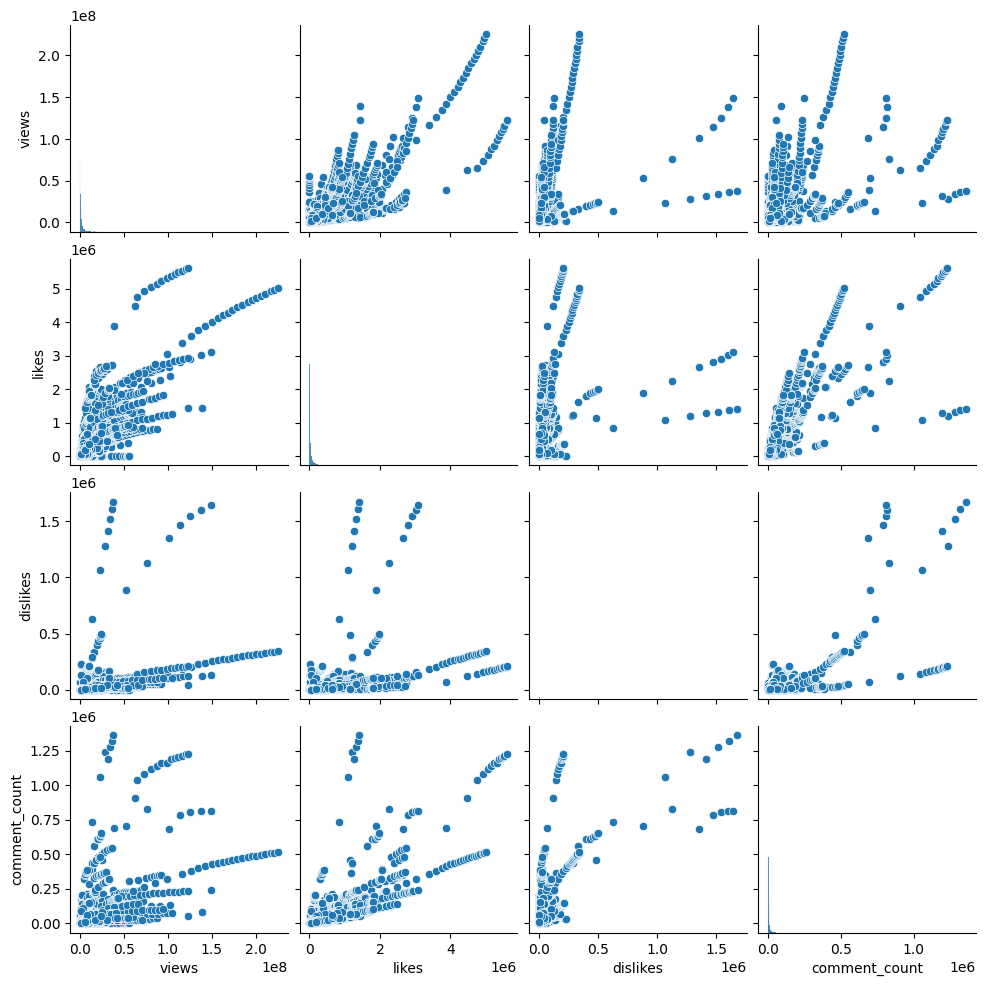

In [15]:
quant_cols = ['views', 'likes', 'dislikes', 'comment_count']
sns.pairplot(df[quant_cols])
plt.show()

## Step 5: Additional Visualizations

In this section, we use different plots to explore specific questions:

- **Histogram of Views**: What is the distribution of view counts?
- **Boxplot of Likes by Category**: Do some content categories receive more likes?
- **Line Plot of Views Over Time**: Are there trends in total views across publishing dates?

Each visualization is paired with an interpretation to help uncover patterns in the data.

## Step 5: Additional Visualizations

### Question 1: What does the view count distribution look like?

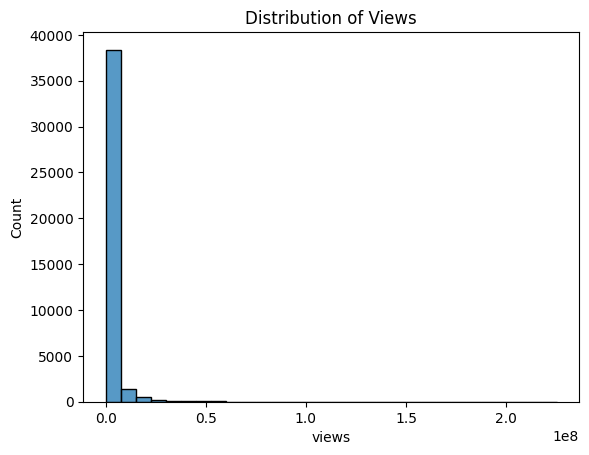

In [22]:
sns.histplot(df['views'], bins=30)
plt.title("Distribution of Views")
plt.show()

### Question 2: Do certain categories get more likes?

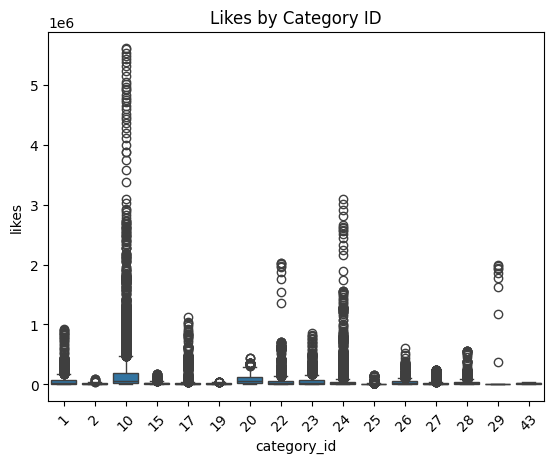

In [23]:
sns.boxplot(x='category_id', y='likes', data=df)
plt.title("Likes by Category ID")
plt.xticks(rotation=45)
plt.show()

### Question 3: How do views trend over time?

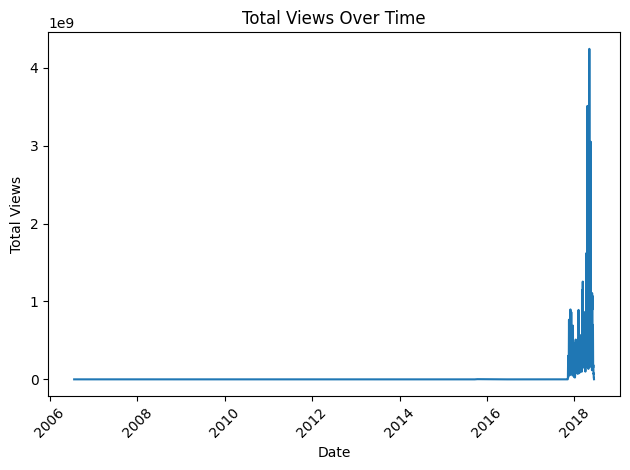

In [24]:
df['date'] = df['publish_time'].dt.date
views_by_date = df.groupby('date')['views'].sum()
views_by_date.plot(title="Total Views Over Time")
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 6: Scatterplot with Linear Regression

We analyze the relationship between **likes and views** using:
- A scatterplot to visualize the distribution
- A regression line to model the linear trend
- The correlation coefficient (r) to assess strength
- A prediction for views based on a hypothetical number of likes (e.g., 100,000 likes)

This gives us insight into how engagement (likes) may influence visibility (views).

## Step 6: Scatterplot with Regression

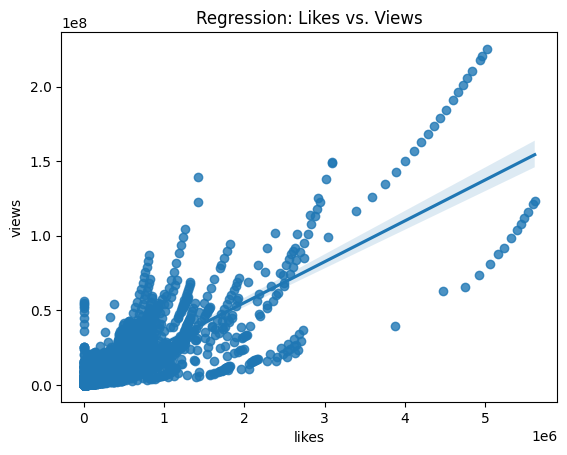

Correlation coefficient (r): 0.8491785476230511
Predicted views for 100,000 likes: 3066462


In [19]:
sns.regplot(x='likes', y='views', data=df)
plt.title("Regression: Likes vs. Views")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(df['likes'], df['views'])
print("Correlation coefficient (r):", r_value)
predicted_views = slope * 100000 + intercept
print(f"Predicted views for 100,000 likes: {predicted_views:.0f}")

## Step 7: Probability Questions

We explore probabilities from our sample dataset using:
- Simple probability (e.g., probability of a video having >1M views)
- AND logic (e.g., high likes AND high comments)
- OR logic (e.g., high dislikes OR high comments)
- Conditional probability (e.g., likelihood of >1M views given a certain category)

All results are sample-based estimates that help us understand general trends.

## Step 7: Probability Questions

In [20]:
# Q1: P(views > 1M)
p1 = (df['views'] > 1_000_000).mean()
print(f"P(video has >1M views): {p1:.2f}")

# Q2: P(likes >100k AND comments >10k)
p2 = ((df['likes'] > 100_000) & (df['comment_count'] > 10_000)).mean()
print(f"P(likes >100k AND comments >10k): {p2:.2f}")

# Q3: Conditional P(views > 1M | category_id == 24)
subset = df[df['category_id'] == 24]
p3 = (subset['views'] > 1_000_000).mean()
print(f"P(views > 1M | category 24): {p3:.2f}")

# Q4: P(dislikes > 10k OR comment_count > 20k)
p4 = ((df['dislikes'] > 10_000) | (df['comment_count'] > 20_000)).mean()
print(f"P(dislikes >10k OR comments >20k): {p4:.2f}")

P(video has >1M views): 0.40
P(likes >100k AND comments >10k): 0.13
P(views > 1M | category 24): 0.40
P(dislikes >10k OR comments >20k): 0.10


## Step 8: Freestyle Exploration

In this final step, we explore an additional aspect of the data to gain further insights. We analyze the top 10 YouTube channels by their **average number of likes** to identify the most consistently engaging creators. This kind of analysis can help pinpoint channels that regularly produce popular content.

## Step 8: Freestyle Exploration